# Visualization of Feature Transformation by a Neural Network

Each layer of a fully connected neural network transforms the input feature space into an output one.

For synthetic data with two features, the network is trained with one hidden layer, with two or three neurons.<br>
The position of the examples in the transformed feature spaces is output.

## Toy data (XOR)

Consider a two-dimensional feature space. There are objects of two kinds (classification into two classes).

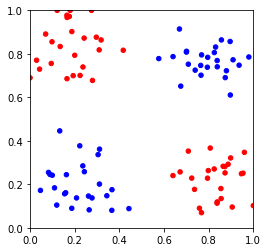

(100, 2) (100, 1)
torch.Size([100, 2]) torch.Size([100, 1])


In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt                             
from   torchinfo    import summary 

num = 25

X1 = np.random.normal( [0.2,0.2], 0.1, (num,2)).clip(0,1);  Y1 = np.full((num,1), 0)   
X2 = np.random.normal( [0.8,0.2], 0.1, (num,2)).clip(0,1);  Y2 = np.full((num,1), 1)   
X3 = np.random.normal( [0.8,0.8], 0.1, (num,2)).clip(0,1);  Y3 = np.full((num,1), 0)   
X4 = np.random.normal( [0.2,0.8], 0.1, (num,2)).clip(0,1);  Y4 = np.full((num,1), 1)   
X = np.concatenate([X1,X2,X3,X4], axis=0);        Y  = np.concatenate([Y1,Y2,Y3,Y4], axis=0)
 
plt.figure (figsize=(4, 4), facecolor ='w')                                 
plt.scatter(X[:,0], X[:,1], c=Y[:,0],  s=20, cmap='bwr')        
plt.xlim(0, 1)
plt.ylim(0, 1);
plt.show()                                                  
print(X.shape, Y.shape)

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y.reshape(-1,1), dtype=torch.float32)

print(X.shape, Y.shape)

## Fully connected neural network with any architecture

In [2]:
class Model_FC(nn.Module):
    def __init__(self, inputs=2, outputs=1, hiddens=[]):   # Add output hidden layers
        super(Model_FC, self).__init__()
        
        self.layers = []
        hiddens = [inputs] + hiddens + [outputs]
        for i in range(1, len(hiddens)):
            self.layers += [
                nn.Linear(hiddens[i-1], hiddens[i]), 
                nn.Sigmoid()
            ]
        
        self.model = nn.Sequential(*self.layers)                 
 
    def forward(self, x):               
        return self.model(x)

    def get(self, x):
        res = []
        for layer in self.layers:
            x = layer(x)
            res.append(x.data.cpu().numpy())
        return res

## Network learning

In [3]:
def fit(model, X,Y, batch_size=2, train=True):    
    batch_size = min(batch_size, len(X))
    losses, accs = [], []                                # losses and  accuracies
                   
    idx = torch.randperm( len(X) )                       # permuted index list
    X, Y = X[idx], Y[idx]        
    
    model.train(train)                                   # important for Dropout, BatchNorm layers    
    for i in range(0, len(Y), batch_size):             
        nb = min(batch_size,  len(Y)-i)
        
        xb, yb = X[i: i+nb], Y[i: i+nb]                  # current batch        
                   
        y = model(xb)                                    # forward propagation        
        L = loss(y, yb)                                  # calculate the loss                
        
        if train:                                        # we are in learning mode
            optimizer.zero_grad()                        # reset the gradients        
            L.backward()                                 # calculate gradients            
            optimizer.step()                             # adjusting parameters
                        
        losses.append( L.detach().item() )                          
        accs.append(  (y.detach().round() == yb).float().mean() )
          
    return np.mean(losses),  np.mean(accs)              # mean error and accurac

## Two new features


<img src="img/nnet_2-2-1.png" style="width:300px">

In [9]:
model = Model_FC(2,1, [2])

loss      = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=1e-3 )

epochs = 5000                                            # number of epochs
for epoch in range(1,epochs+1):                          
    L,A = fit(model, X, Y)                               # one epoch    
    if epoch % 100 == 0 or epoch == epochs:                 
        print(f'\repoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}', end="" ) 

epoch:  5000 loss: 0.4506 accuracy: 0.7000

## Hidden layer visualization

(100, 2)
(100, 2)
(100, 1)
(100, 1)
(100, 2) (100,)


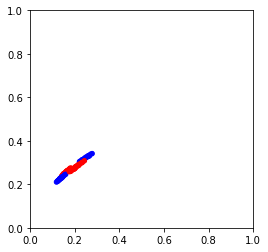

torch.Size([100, 2]) torch.Size([100, 1])


In [5]:
#print(model)
res = model.get(X)
for r in res:
    print(r.shape)

x = res[1]    
y = Y.numpy().reshape(-1,)
print(x.shape, y.shape)

plt.figure (figsize=(4, 4), facecolor ='w')                                 
plt.scatter(x[:,0], x[:,1], c=y,  s=20, cmap='bwr')        
plt.xlim(0, 1)
plt.ylim(0, 1);
plt.show()                                                  
print(X.shape, Y.shape)    


## Three new Features

<img src="img/nnet_2-3-1.png" style="width:300px">

In [ ]:
model = Model_FC(2,1, [3])

loss      = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=1e-3 )

epochs = 5000                                            # number of epochs
for epoch in range(1,epochs+1):                          
    L,A = fit(model, X, Y)                               # one epoch
     
    if epoch % 100 == 0 or epoch == epochs:                 
        print(f'\repoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}', end="" ) 

## Hidden layer visualization

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

res = model.get(X)
x = res[1]    
y = Y.numpy().reshape(-1,)
print(x.shape, y.shape)


fig = plt.figure (figsize=(8, 8), facecolor ='w')       
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=y,  cmap='bwr')    

plt.show()                                                  

## Classification visualization

In [ ]:
X_MIN, X_MAX, X_NUM = 0., 1., 100
Y_MIN, Y_MAX, Y_NUM = 0., 1., 100

x = np.linspace(X_MIN, X_MAX, X_NUM, dtype=np.float32)
y = np.linspace(Y_MIN, Y_MAX, Y_NUM, dtype=np.float32)
x, y =  np.meshgrid(x, y)    

inp = torch.cat([torch.tensor(x).view(-1,1), torch.tensor(y).view(-1,1)], 1)

z  = model(inp).detach().view(X_NUM, Y_NUM).numpy()
    
plt.figure(figsize=(4,4), facecolor ='w')
plt.imshow(z, extent=[X_MIN, X_MAX, Y_MIN, Y_MAX],  origin='lower', cmap='seismic', alpha=0.2)
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],  s=20, cmap='bwr')        
plt.show()